# AutoGen 이란

AutoGen은 Microsoft에서 개발한 도구로, 복잡한 작업을 위한 여러 에이전트(agents)를 만들고 관리할 수 있도록 설계되었습니다. 이 도구는 특히 대화형 시스템과 관련된 프로젝트에서 유용합니다. AutoGen을 사용하면 다양한 역할을 하는 에이전트들을 구성하고, 이들 간의 상호작용을 관리하며, 그룹 채팅 시나리오를 구현할 수 있습니다.

예를 들어, AutoGen은 UserProxyAgent, AssistantAgent, 그리고 GroupChat 같은 다양한 컴포넌트로 구성되어 있습니다. 
이러한 컴포넌트들은 각각 사용자, 코딩 어시스턴트, 제품 관리자 등의 역할을 수행할 수 있으며, 이들을 조합하여 복잡한 대화 및 협업 시나리오를 구축할 수 있습니다. 

AutoGen은 이렇게 다양한 에이전트들을 조합하여, 사용자의 요구사항에 맞는 특정 작업을 수행하는 데 효과적입니다.


- 복잡한 LLM 워크플로의 조정, 자동화 및 최적화를 단순화하여 LLM 모델의 성능을 극대화하고 약점을 극복
- 복잡한 워크플로우를 위한 다양한 대화 패턴 및 작업 시스템을 지원
- 향상된 LLM 추론을 제공: API 통합 및 캐싱과 같은 유틸리티와 오류 처리, 다중 구성 추론, 컨텍스트 프로그래밍 등과 같은 고급 사용 패턴을 제공

![AutoGen을 사용한 대화 흐름의 예](https://microsoft.github.io/autogen/assets/images/chat_example-da70a7420ebc817ef9826fa4b1e80951.png)

In [1]:
"""
Basic Example
"""

from autogen import AssistantAgent, UserProxyAgent, config_list_from_json

config_list = config_list_from_json(env_or_file="OAI_CONFIG_LIST.json")
assistant = AssistantAgent("assistant", llm_config={"config_list": config_list})
user_proxy = UserProxyAgent("user_proxy", code_execution_config={"work_dir": "coding"})

"""
Command: NVDA 및 TESLA 연초 대비 증감율에 관한 주가 변동 차트를 그립니다.
Result: You will find the plot image saved as "stock_price.png" in your current working directory. You can check it manually.
"""
user_proxy.initiate_chat(assistant, message="Plot a chart of NVDA and TESLA stock price change YTD.")

FileNotFoundError: [Errno 2] No such file or directory: 'OAI_CONFIG_LIST.json'

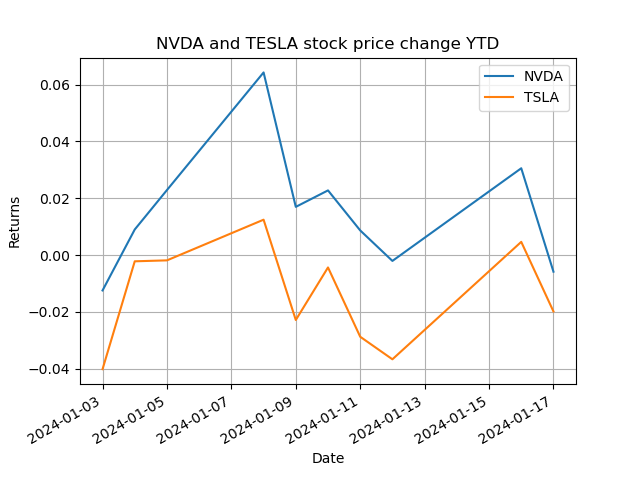

In [ ]:
from IPython.display import Image

Image("coding/stock_price.png")

### Example Task: Check Stock Price Change

In [ ]:
from typing import Dict, Union
from IPython import get_ipython
from IPython.display import Image
import autogen

config_list = autogen.config_list_from_json(env_or_file="OAI_CONFIG_LIST.json")

llm_config = {
    "timeout": 600,
    "cache_seed": 42,
    "config_list": config_list,
    "temperature": 0,
}

In [ ]:
# create an AssistantAgent instance named "assistant"
assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config=llm_config,
)
# create a UserProxyAgent instance named "user_proxy"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="TERMINATE",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={"work_dir": "web"},
    llm_config=llm_config,
    system_message="""Reply TERMINATE if the task has been solved at full satisfaction.
Otherwise, reply CONTINUE, or the reason why the task is not solved yet.""",
)

In [ ]:
"""
https://arxiv.org/abs/2308.08155

제목: AutoGen: Enabling Next-Gen LLM Applications via Multi-Agent Conversation
내용요약: LLM을 활용한 다중 에이전트 시스템의 개발이 어떻게 다양한 응용 프로그램과 복잡한 작업을 지원할 수 있는지에 대한 통찰력을 제공하는 내용
"""


# the assistant receives a message from the user, which contains the task description
user_proxy.initiate_chat(
    assistant,
    message="""
Who should read this paper: https://arxiv.org/abs/2308.08155
""",
)

user_proxy (to assistant):


Who should read this paper: https://arxiv.org/abs/2308.08155


--------------------------------------------------------------------------------
assistant (to user_proxy):

To determine who should read the paper, we need to first understand the content and context of the paper. We can do this by fetching the abstract of the paper from the provided URL and analyzing it. 

Here is a Python script that uses the BeautifulSoup library to scrape the abstract of the paper from the webpage. 

```python
# filename: fetch_abstract.py

import requests
from bs4 import BeautifulSoup

def fetch_abstract(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    abstract = soup.find('blockquote', attrs={'class': 'abstract mathjax'}).text.strip()
    return abstract

url = "https://arxiv.org/abs/2308.08155"
print(fetch_abstract(url))
```

Please run this script to fetch the abstract of the paper. The output will help us understand the 

execute_code was called without specifying a value for use_docker. Since the python docker package is not available, code will be run natively. Note: this fallback behavior is subject to change


user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 
Abstract:AutoGen is an open-source framework that allows developers to build LLM applications via multiple agents that can converse with each other to accomplish tasks. AutoGen agents are customizable, conversable, and can operate in various modes that employ combinations of LLMs, human inputs, and tools. Using AutoGen, developers can also flexibly define agent interaction behaviors. Both natural language and computer code can be used to program flexible conversation patterns for different applications. AutoGen serves as a generic infrastructure to build diverse applications of various complexities and LLM capacities. Empirical studies demonstrate the effectiveness of the framework in many example applications, with domains ranging from mathematics, coding, question answering, operations research, online decision-making, entertainment, etc.


---------------------------------------------------------------------

In [ ]:
user_proxy.initiate_chat(
    assistant,
    message="""Show me the YTD gain of 10 largest technology companies as of today.""",
)

user_proxy (to assistant):

Show me the YTD gain of 10 largest technology companies as of today.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To accomplish this task, we can use Python with the help of the `yfinance` library to fetch the stock data, and `pandas` to handle the data. 

Here is the plan:
1. Define the list of the 10 largest technology companies. We'll use the symbols of their stocks for this. The list includes: Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Alphabet (GOOGL), Facebook (FB), Tesla (TSLA), Nvidia (NVDA), Adobe (ADBE), Paypal (PYPL), and Netflix (NFLX).
2. For each company, fetch the stock data from the beginning of the year to today.
3. Calculate the YTD (Year-to-Date) gain for each company.
4. Print the YTD gain for each company.

Please execute the following Python code:

```python
# filename: ytd_gain.py

import yfinance as yf
import pandas as pd
from datetime import datetime

# Define the l

execute_code was called without specifying a value for use_docker. Since the python docker package is not available, code will be run natively. Note: this fallback behavior is subject to change


user_proxy (to assistant):

exitcode: 1 (execution failed)
Code output: 
Traceback (most recent call last):
  File "ytd_gain.py", line 26, in <module>
    df_ytd_gain = df_ytd_gain.append({'Company': company, 'YTD Gain': ytd_gain}, ignore_index=True)
                  ^^^^^^^^^^^^^^^^^^
  File "/Users/heewungsong/anaconda3/lib/python3.11/site-packages/pandas/core/generic.py", line 5989, in __getattr__
    return object.__getattribute__(self, name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'DataFrame' object has no attribute 'append'. Did you mean: '_append'?


--------------------------------------------------------------------------------
assistant (to user_proxy):

I apologize for the confusion. The error is due to a mistake in the code. The `append` method is indeed a valid method for a pandas DataFrame. The error might be due to a version issue or an environment issue.

Let's try a slightly different approach by creating a list of dictionaries first and then co

execute_code was called without specifying a value for use_docker. Since the python docker package is not available, code will be run natively. Note: this fallback behavior is subject to change


user_proxy (to assistant):

exitcode: 1 (execution failed)
Code output: 
FB: No timezone found, symbol may be delisted
Traceback (most recent call last):
  File "ytd_gain.py", line 23, in <module>
    ytd_gain = ((hist['Close'][-1] - hist['Close'][0]) / hist['Close'][0]) * 100
                 ~~~~~~~~~~~~~^^^^
  File "/Users/heewungsong/anaconda3/lib/python3.11/site-packages/pandas/core/series.py", line 1004, in __getitem__
    return self._values[key]
           ~~~~~~~~~~~~^^^^^
IndexError: index -1 is out of bounds for axis 0 with size 0


--------------------------------------------------------------------------------
assistant (to user_proxy):

I apologize for the inconvenience. The error indicates that the historical data for Facebook (FB) could not be fetched, possibly due to a delisting or a temporary issue with the data source.

To handle such cases, we can add a check to ensure that the historical data is not empty before calculating the YTD gain. If the historical data is e

execute_code was called without specifying a value for use_docker. Since the python docker package is not available, code will be run natively. Note: this fallback behavior is subject to change



>>>>>>>> EXECUTING CODE BLOCK 1 (inferred language is shell)...


execute_code was called without specifying a value for use_docker. Since the python docker package is not available, code will be run natively. Note: this fallback behavior is subject to change


user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 
No historical data found for FB. Skipping...
  Company   YTD Gain
0    AAPL  -1.594488
1    MSFT   5.015236
2    AMZN   1.187230
3   GOOGL   2.388364
4    TSLA -13.231622
5    NVDA  16.369797
6    ADBE   2.763454
7    PYPL  -2.554507
8    NFLX   2.525077

No historical data found for FB. Skipping...
  Company   YTD Gain
0    AAPL  -1.594488
1    MSFT   5.015236
2    AMZN   1.187230
3   GOOGL   2.388364
4    TSLA -13.231622
5    NVDA  16.369797
6    ADBE   2.763454
7    PYPL  -2.554507
8    NFLX   2.525077


--------------------------------------------------------------------------------
assistant (to user_proxy):

The code has successfully fetched the Year-to-Date (YTD) gain for the 9 largest technology companies. Unfortunately, it couldn't fetch the data for Facebook (FB) due to some issues with the data source.

Here are the YTD gains for the companies:

- Apple (AAPL): -1.59%
- Microsoft (MSFT): 5.01%
- Amaz

In [ ]:
"""
Auto Generated Agent Chat: GPTAssistant with Code Interpreter
"""

import io

from IPython.display import display
from PIL import Image

import autogen
from autogen.agentchat import AssistantAgent, UserProxyAgent
from autogen.agentchat.contrib.gpt_assistant_agent import GPTAssistantAgent

config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST.json",
    file_location=".",
    filter_dict={
        "model": ["gpt-3.5-turbo", "gpt-35-turbo", "gpt-4", "gpt4", "gpt-4-32k", "gpt-4-turbo"],
    },
)

In [ ]:
gpt_assistant = GPTAssistantAgent(
    name="Coder Assistant",
    llm_config={
        "tools": [{"type": "code_interpreter"}],
        "config_list": config_list,
    },
    instructions="You are an expert at writing python code to solve problems. Reply TERMINATE when the task is solved and there is no problem.",
)

user_proxy.initiate_chat(
    gpt_assistant,
    message="Draw a line chart to show the population trend in Korea. Show how you solved it with code.",
    clear_history=True,
)

GPT Assistant only supports one OpenAI client. Using the first client in the list.
No matching assistant found, creating a new assistant


user_proxy (to Coder Assistant):

Draw a line chart to show the population trend in Korea. Show how you solved it with code.

--------------------------------------------------------------------------------
Coder Assistant (to user_proxy):

To create a line chart showing the population trend in Korea, I'll need population data over a series of years. This data may come from official sources like the United Nations, World Bank, or Korean statistical agencies. Since we don't have internet access in this environment, I will use hypothetical data to illustrate how one would create such a line chart in Python using the `matplotlib` library.

First, I'll generate some fictional population data for Korea over a period of years. Then I'll write code to create a line chart using this data. Here are the steps:

1. Import the `matplotlib` library.
2. Create a list of years (x-axis).
3. Create a list of population figures corresponding to those years (y-axis).
4. Plot the data using `plt.plot()`.


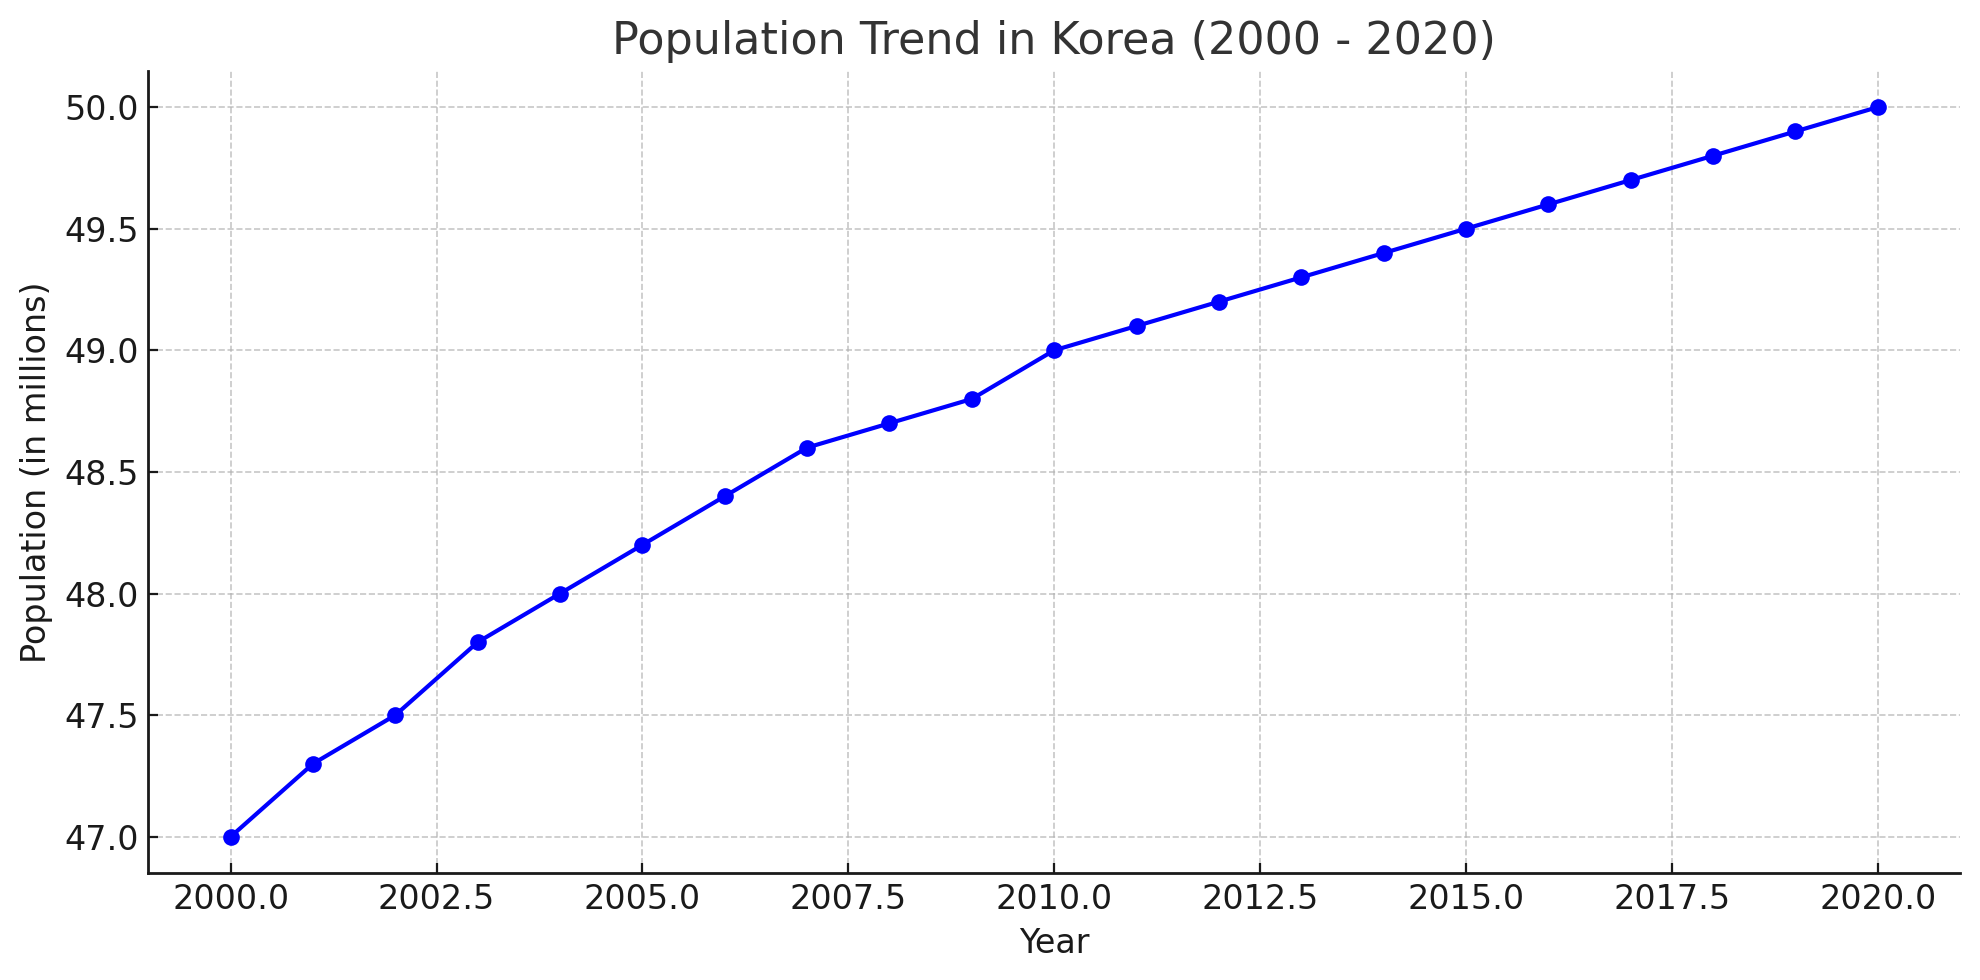

In [ ]:
api_response = gpt_assistant.openai_client.files.with_raw_response.retrieve_content("file-DqKnRYUZGFAvR5JXj5sm8foG")

if api_response.status_code == 200:
    content = api_response.content
    image_data_bytes = io.BytesIO(content)
    image = Image.open(image_data_bytes)
    display(image)

In [ ]:
user_proxy.initiate_chat(
    gpt_assistant,
    message="Draw a line chart that shows the trends in our fertility rate. Show us how you solved it with code.",
    clear_history=True,
)

user_proxy (to Coder Assistant):

Draw a line chart that shows the trends in our fertility rate. Show us how you solved it with code.

--------------------------------------------------------------------------------
Coder Assistant (to user_proxy):

To draw a line chart showing the trends in fertility rates, I will need some fertility rate data over a period of time. This data is usually provided by statistics agencies or can be found in datasets regarding demographics.

For this task, I'll create some hypothetical fertility rate data over a period of years to illustrate how the code can be used to generate a line chart. If you have actual data you'd like to use instead, please provide it, and I can work with that data.

Let's proceed with the hypothetical example. The fertility rate will be measured as the average number of children born to a woman over her lifetime. I'll assume we're looking at the data from 2000 to 2020.

I will now write the code to generate the line chart.


Recei

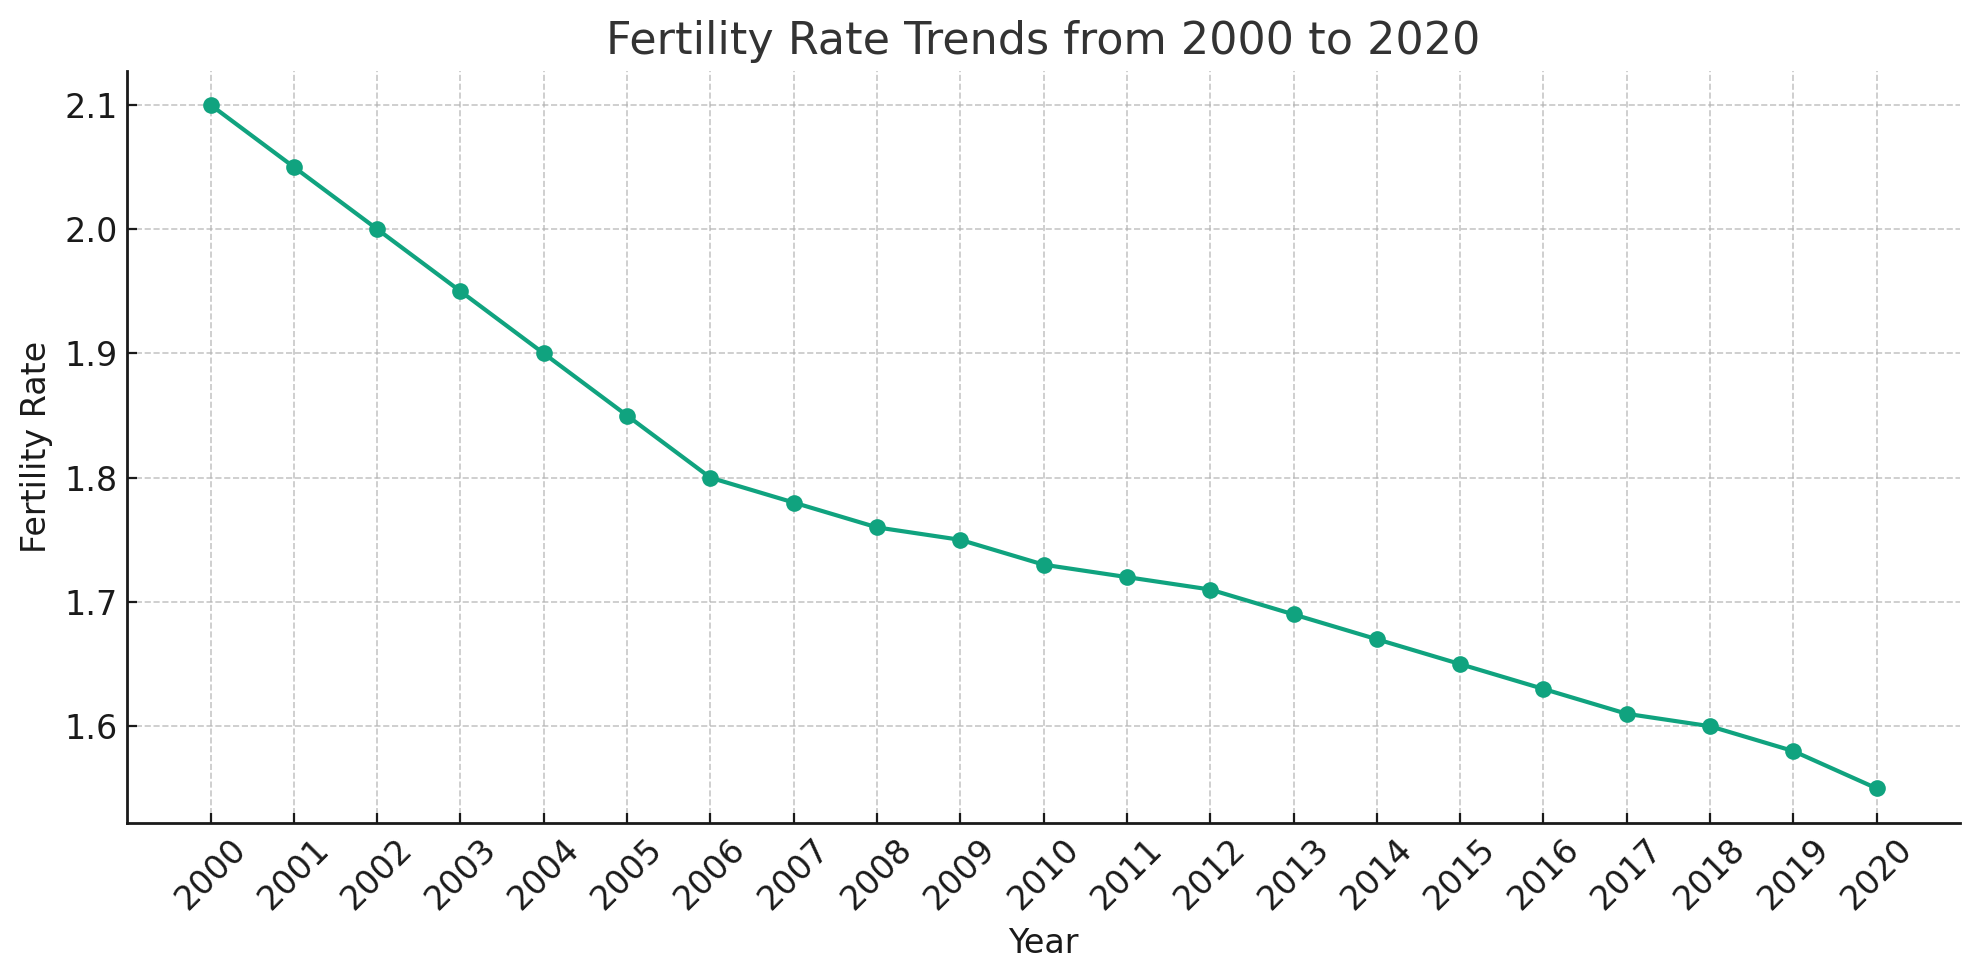

In [ ]:
api_response = gpt_assistant.openai_client.files.with_raw_response.retrieve_content("file-wpBlnhZ6V48HLYQZ1KyjAmHB")

if api_response.status_code == 200:
    content = api_response.content
    image_data_bytes = io.BytesIO(content)
    image = Image.open(image_data_bytes)
    display(image)

In [ ]:
"""
AutoBuild: 에이젼트 생성
"""

import autogen
from autogen.agentchat.contrib.agent_builder import AgentBuilder

llm_config = {"temperature": 0}
config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST.json",
    file_location=".",
    filter_dict={
        "model": ["gpt-4-1106-preview", "gpt-4"],
    },
)

In [ ]:
def start_task(execution_task: str, agent_list: list):
    group_chat = autogen.GroupChat(agents=agent_list, messages=[], max_round=12)
    manager = autogen.GroupChatManager(groupchat=group_chat, llm_config={"config_list": config_list, **llm_config})
    agent_list[0].initiate_chat(manager, message=execution_task)

In [ ]:
"""
Step: create a AgentBuilder
"""

builder = AgentBuilder(
    config_file_or_env="OAI_CONFIG_LIST.json", 
    builder_model="gpt-4-1106-preview", 
    agent_model="gpt-4-1106-preview"
)

In [ ]:
"""
specify a building task
"""
building_task = "Read and understand the path of the given excel, csv file, visualize it, and derive insights that can be obtained through data."
agent_list, agent_configs = builder.build(building_task, llm_config)

==> Generating agents...
['data_analyst', 'excel_visualization_specialist', 'business_insights_strategist', 'python_data_scientist', 'csv_data_interpreter'] are generated.
==> Generating system message...
Preparing system message for data_analyst
Preparing system message for excel_visualization_specialist
Preparing system message for business_insights_strategist
Preparing system message for python_data_scientist
Preparing system message for csv_data_interpreter
==> Generating description...
Preparing description for data_analyst
Preparing description for excel_visualization_specialist
Preparing description for business_insights_strategist
Preparing description for python_data_scientist
Preparing description for csv_data_interpreter
==> Creating agents...
Creating agent data_analyst with backbone gpt-4-1106-preview...
Creating agent excel_visualization_specialist with backbone gpt-4-1106-preview...
Creating agent business_insights_strategist with backbone gpt-4-1106-preview...
Creating 

In [ ]:
for agent in agent_list:
  print(f"Name: {agent.name}");
  print(f"Desc: {agent.description}\n");

Name: User_console_and_code_interpreter
Desc: A user console with a code interpreter interface.
It can provide the code execution results. Select this player when other players provide some code that needs to be executed.
DO NOT SELECT THIS PLAYER WHEN NO CODE TO EXECUTE; IT WILL NOT ANSWER ANYTHING.

Name: data_analyst
Desc: Data Analysts are analytical thinkers with proficiency in data collection, processing, and interpretation to derive actionable insights. They should possess strong critical thinking skills to question and validate the accuracy of information shared in the group chat, and when necessary, rectify it. While not primarily programmers, they should have a solid grasp of Python for data manipulation and analysis tasks.

Name: excel_visualization_specialist
Desc: An Excel Visualization Specialist is an expert in creating and interpreting complex data visualizations within Microsoft Excel, ensuring accurate and effective presentation of data insights. This role should poss

In [ ]:
# csv_file_path = "/Users/heewungsong/Desktop/SideProjects/langchain/assets/csvs/statistics on foreign residents in South Korea.csv"
csv_file_path = "https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv"

command = f"dowload given csv file url is '{csv_file_path}' and visualize based on the data from csv and give insights through data analysis"
start_task(
    execution_task=command,
    agent_list=agent_list,
)

User_console_and_code_interpreter (to chat_manager):

Visualize based on the local path is '/Users/heewungsong/Desktop/SideProjects/langchain/assets/csvs/statistics on foreign residents in South Korea.csv' given and give insights through data analysis

--------------------------------------------------------------------------------


csv_data_interpreter (to chat_manager):

As a csv_data_interpreter, I don't have direct access to local file paths or the ability to execute code. However, I can guide you through the process of loading, analyzing, and visualizing the data using Python libraries. Here's a step-by-step guide you can follow on your local machine:

1. **Load the CSV file using pandas:**
```python
import pandas as pd

# Load the data
file_path = '/Users/heewungsong/Desktop/SideProjects/langchain/assets/csvs/statistics on foreign residents in South Korea.csv'
data = pd.read_csv(file_path)

# Check the first few rows of the dataframe
print(data.head())
```

2. **Data Cleaning:**
```python
# Check for missing values
print(data.isnull().sum())

# Drop or fill missing values if necessary
# data = data.dropna()  # to drop rows with missing values
# data = data.fillna(method='ffill')  # to forward-fill missing values

# Check data types and convert if necessary
print(data.dtypes)
# data['column_name'] = data['col

In [ ]:
builder.clear_all_agents(recycle_endpoint=True)

All agents have been cleared.


In [ ]:
saved_path = builder.save()

Building config saved to ./save_config_c52224ebd16a2e60b348f3f04ac15e79.json


In [ ]:
new_builder = AgentBuilder(config_file_or_env=config_file_or_env)
agent_list, agent_configs = new_builder.load(
    "./save_config_c52224ebd16a2e60b348f3f04ac15e79.json"
)